In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("slr05.csv")
df.head()

,X,Y
0,"6,2",29
1,"9,5",44
2,"10,5",36
3,"7,7",37
4,"8,6",53


In [2]:
df = df.replace(',', '.', regex=True)
df['X'] = pd.to_numeric(df['X'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       42 non-null     float64
 1   Y       42 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 804.0 bytes


<Axes: xlabel='X', ylabel='Y'>

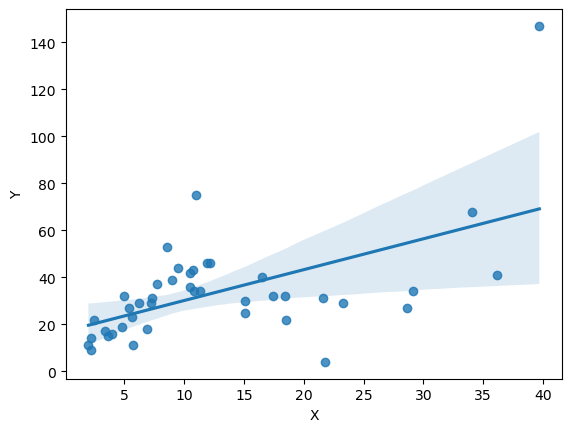

In [8]:
sns.regplot(data = df, x = 'X', y = 'Y')

In [4]:
y = df['X'].values.reshape(-1, 1)
X = df['Y'].values.reshape(-1, 1)
SEED = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
print(regressor.intercept_)
print(regressor.coef_)

[4.0918328]
[[0.24842471]]


In [6]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0    21.8   5.085532
1    10.8  12.538273
2     2.2   7.569779
3    10.5  13.035123
4    21.6  11.792999
5    11.3  12.538273
6    16.5  14.028821
7    10.7  14.774096
8     4.0   8.066628


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 5.33
Mean squared error: 50.51
Root mean squared error: 7.11
